In [1]:
import jax 
import time
import torch

import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt

# Pedagogical examples
Let’s examine some well-known examples that illustrate both the forward and reverse modes of Automatic Differentiation (AD).

## Speelpenning function $: \mathbb{R}^n \rightarrow \mathbb{R}$
Given an input vector $x = (x_1, x_2, \ldots, x_n)$, the Speelpenning function is given as:

$
f(x) = x_1 \cdot x_2 \cdot \ldots \cdot x_n
$

The partial derivatives are:

$
\frac{\partial f}{\partial x_i} = \prod_{j \neq i} x_j
$

Computing all partial derivatives (i.e., $\nabla f$):
 - **Forward mode AD** requires *n* forward passes, one for each partial derivative;  
 - **Reverse mode AD** requires *one* reverse pass after *one* forward pass for the function evaluation.


In [7]:
# Forward mode AD 

# Speelpenning function: product of all inputs
def speelpenning(x):
    return jnp.prod(x)

# Input vector
x = jnp.array([1.0, 2.0, 3.0, 4.0])

# Forward mode: compute full gradient
grad_forward = jax.jacfwd(speelpenning)(x)
print("Forward mode gradient:", grad_forward)

# Reverse mode AD
grad_reverse = jax.jacrev(speelpenning)(x)
print("Reverse mode gradient:", grad_reverse)


Forward mode gradient: [24. 12.  8.  6.]
Reverse mode gradient: [24. 12.  8.  6.]


## Parameterized curve $: \mathbb{R} \rightarrow \mathbb{R}^n$
We define a parameterized curve $\varphi: \mathbb{R} \to \mathbb{R}^n$:

$
\varphi(t) = 
\begin{bmatrix} 
a_1 e^{b_1 t} \\ 
a_2 e^{b_2 t} \\ 
\vdots \\ 
a_n e^{b_n t} 
\end{bmatrix}
$

$a_i$ and $b_i$ are constants.
To compute the full Jacobian:
 - **Forward mode AD** requires *one* forward pass;
 - **Reverse mode AD** requires *n* reverse passes after *one* forward pass.


In [13]:
# Forward mode AD
# General n
n = 6  # change as needed
t = 1.0  # scalar input

# Parameters
a = jnp.arange(1, n+1) * 0.5      # [0.5, 1.0, 1.5, ...]
b = jnp.linspace(0.1, 0.1*n, n)   # [0.1, 0.2, ..., 0.6]

# curve definition
def phi(a, b):
    def phi_(t):
        return a * jnp.exp(b * t)
    return phi_


# Forward mode AD
jacobian_forward = jax.jacfwd(phi(a, b))(t)
print("Forward mode Jacobian:", jacobian_forward)

# Reverse mode AD  
jacobian_reverse = jax.jacrev(phi(a, b))(t)
print("Reverse mode Jacobian:", jacobian_reverse)


Forward mode Jacobian: [0.05525855 0.24428056 0.6074365  1.1934597  2.0609016  3.2798142 ]
Reverse mode Jacobian: [0.05525855 0.24428056 0.6074365  1.1934597  2.0609016  3.2798142 ]


## Linear system $: \mathbb{R}^n \rightarrow \mathbb{R}^n$
We consider the linear system:

$
\mathbf{y} = A \mathbf{x}, \quad \mathbf{x} \in \mathbb{R}^n, \mathbf{y} \in \mathbb{R}^n,
$

where $A \in \mathbb{R}^{n\times n}$ is a constant matrix.

To compute the full Jacobian:
- **Forward mode AD** requires *n* forward passes, each provides a column of the Jacobian;
- **Reverse mode AD** requires *n* reverse passes after *one* forward pass, each provides a row of the Jacobian.

For this linear system, the Jacobian is simply $A$.


In [14]:
# System size (change as needed)
n = 6

# Input vector
x = jnp.arange(1, n+1, dtype=jnp.float32)

# Random or sequential linear system matrix
A = jnp.arange(1, n*n+1, dtype=jnp.float32).reshape(n, n) * 0.1  # e.g., 0.1,0.2,...0.36 for n=6
#print("A:",A)

# Linear system function
def linear_system(A):
    def linear_system_(x):
        return A @ x
    return linear_system_


# Forward mode AD
jac_forward = jax.jacfwd(linear_system(A))(x)
print("Forward mode Jacobian:\n", jac_forward)

# Reverse mode AD
jac_reverse = jax.jacrev(linear_system(A))(x)
print("Reverse mode Jacobian:\n", jac_reverse)


Forward mode Jacobian:
 [[0.1        0.2        0.3        0.4        0.5        0.6       ]
 [0.7        0.8        0.90000004 1.         1.1        1.2       ]
 [1.3000001  1.4        1.5        1.6        1.7        1.8000001 ]
 [1.9        2.         2.1000001  2.2        2.3        2.4       ]
 [2.5        2.6000001  2.7        2.8        2.9        3.        ]
 [3.1000001  3.2        3.3        3.4        3.5        3.6000001 ]]
Reverse mode Jacobian:
 [[0.1        0.2        0.3        0.4        0.5        0.6       ]
 [0.7        0.8        0.90000004 1.         1.1        1.2       ]
 [1.3000001  1.4        1.5        1.6        1.7        1.8000001 ]
 [1.9        2.         2.1000001  2.2        2.3        2.4       ]
 [2.5        2.6000001  2.7        2.8        2.9        3.        ]
 [3.1000001  3.2        3.3        3.4        3.5        3.6000001 ]]


In [15]:
## Bonus task ##
n = 6
x = torch.arange(1, n+1, dtype=torch.float32, requires_grad=True)

# Linear system matrix
A_torch = torch.arange(1, n*n+1, dtype=torch.float32).reshape(n, n) * 0.1

def linear_system_torch(A_torch):
    def linear_system_torch_(x):
        return A_torch @ x
    return linear_system_torch_

# Compute full Jacobian
jacobian = torch.autograd.functional.jacobian(linear_system_torch(A_torch), x)
print("Jacobian (PyTorch):\n", jacobian)


Jacobian (PyTorch):
 tensor([[0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000],
        [0.7000, 0.8000, 0.9000, 1.0000, 1.1000, 1.2000],
        [1.3000, 1.4000, 1.5000, 1.6000, 1.7000, 1.8000],
        [1.9000, 2.0000, 2.1000, 2.2000, 2.3000, 2.4000],
        [2.5000, 2.6000, 2.7000, 2.8000, 2.9000, 3.0000],
        [3.1000, 3.2000, 3.3000, 3.4000, 3.5000, 3.6000]])


## Hands on exercises

Compute the gradients using JAX's **forward** and **reverse** mode for the following functions:
- $f(x) = x^2 + 3x + 2$
- $f(x) = x^2y + 2y $
- $f(x) = \sum\limits_i x_i^2 $
- $f(x) = e^x \cdot \sin(x)$

Bonus : Do the same using pytorch.

## Scaling graphs

The expression $\frac{\mathcal{O}(Df)}{\mathcal{O}(f)}$ in the AD context refers to the computational complexity ratio between evaluating a derivative (via AD) and evaluating the original function. **This ratio measures how expensive it is to compute derivatives compared to computing the function itself**.

### Three function types

We compare the computational cost ratio $\frac{\mathcal{O}(Df)}{\mathcal{O}(f)}$,
 for three types of functions under forward-mode and reverse-mode AD:

1. **Speelpenning example**
2. **Parameterized curve**
3. **Linear system**

We will measure or simulate $\frac{\mathcal{O}(Df)}{\mathcal{O}(f)}$ using **forward mode and reverse mode AD** (JAX), also visualizing how it scales with $n$.


In [ ]:

def benchmark(f, x, num_runs=5):
    t1 = time.time()
    for _ in range(num_runs):
        f(x)
    t2 = (time.time() - t1) / num_runs
    return t2

def compute_jac_fwd(f):
    def compute_jac_(x):
        tangent = jnp.zeros_like(x)
        for i in range(len(x)):
            tangent.at[i].set(1.0)
            _ = jax.jvp(f, (x,), (tangent, ))
            tangent.at[i].set(0.0)
    return compute_jac_


def compute_jac_rev(f, x_bar):
    vjp_f = jax.vjp(f, x_bar)[1]
    def compute_jac_(ybar):
        _ = vjp_f(ybar)
    return compute_jac_
        
        

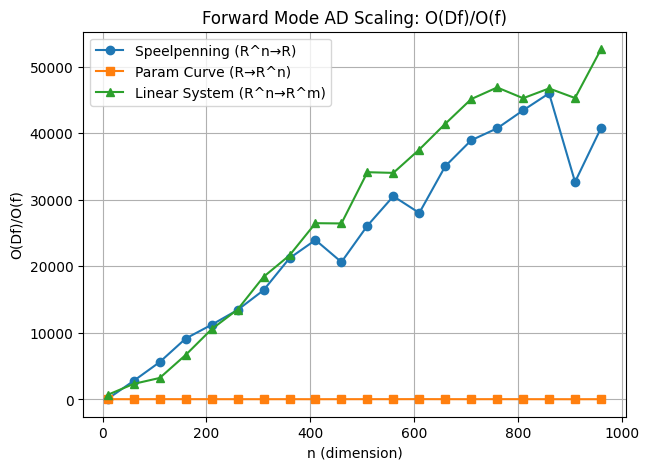

In [ ]:
### Forward Mode ###

# Settings
ns = np.arange(10, 1001, 50)
ratios_forward = {'speel': [], 'curve': [], 'linsys': []}

# Main loop (forward mode only)
for n in ns:
    # Speelpenning: R^n -> R
    x = jnp.arange(1.0, n + 1)
    
    time_speel = benchmark(speelpenning, x) 
    time_jac_speel = benchmark(compute_jac_fwd(speelpenning), x)
    ratios_forward['speel'].append(time_jac_speel / time_speel)

    # parameterized curve map: R -> R^n
    a = jnp.arange(1, n+1) * 0.5      # [0.5, 1.0, 1.5, ...]
    b = jnp.linspace(0.1, 0.1*n, n)   # [0.1, 0.2, ..., 0.6]
    t = jnp.array([1.0])
    time_curve = benchmark(phi(a, b), t)
    time_jac_curve = benchmark(compute_jac_fwd(phi(a, b)), t)
    ratios_forward['curve'].append(time_jac_curve / time_curve)

    # Linear system: R^n -> R^n
    A = jnp.arange(1.0, n**2 + 1).reshape(n, n)
    x = jnp.arange(1.0, n + 1)
    time_linear_system = benchmark(linear_system(A), x)
    time_jac_linear_system = benchmark(compute_jac_fwd(linear_system(A)), x)
    ratios_forward['linsys'].append(time_jac_linear_system / time_linear_system)

# Plot (Forward Mode)
plt.figure(figsize=(7,5))
plt.plot(ns, ratios_forward['speel'], 'o-', label="Speelpenning (R^n→R)")
plt.plot(ns, ratios_forward['curve'], 's-', label="Param Curve (R→R^n)")
plt.plot(ns, ratios_forward['linsys'], '^-', label="Linear System (R^n→R^m)")
plt.title("Forward Mode AD Scaling: O(Df)/O(f)")
plt.xlabel("n (dimension)")
plt.ylabel("O(Df)/O(f)")
plt.grid(True)
plt.legend()
plt.show()


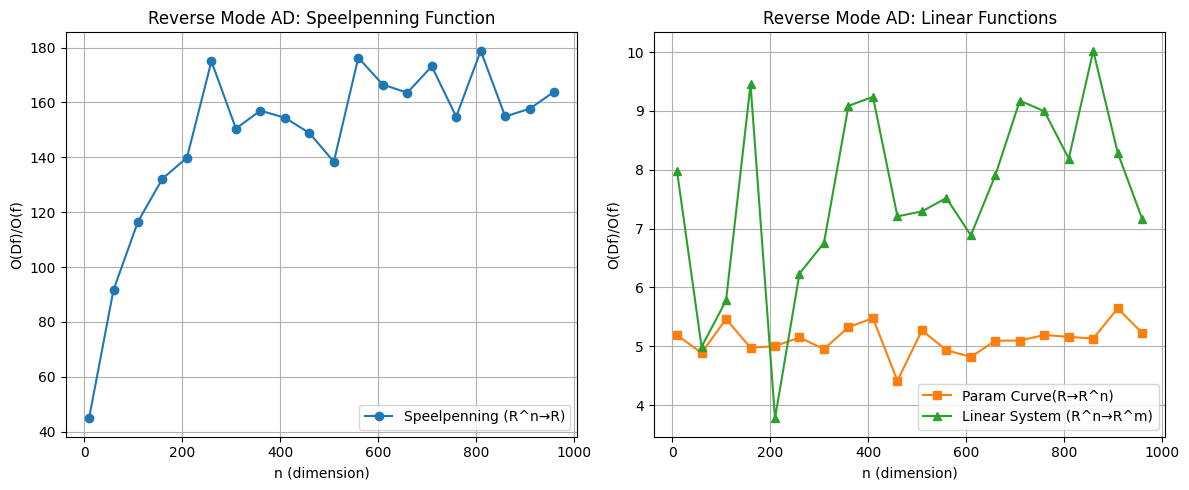

In [62]:
### Reverse Mode ###

# Settings
ns = np.arange(10, 1001, 50)
ratios_reverse = {'speel': [], 'curve': [], 'linsys': []}

# Main loop (reverse mode only)
for n in ns:
    # Speelpenning: R^n -> R
    x = jnp.arange(1.0, n + 1)
    y_bar = jnp.array(1.0)
    time_speel = benchmark(speelpenning, x) 
    time_jac_speel = benchmark(compute_jac_rev(speelpenning, x), y_bar, num_runs=100)
    ratios_reverse['speel'].append(time_jac_speel / time_speel)

    # parameterized curve map: R -> R^n
    a = jnp.arange(1, n+1) * 0.5      # [0.5, 1.0, 1.5, ...]
    b = jnp.linspace(0.1, 0.1*n, n)   # [0.1, 0.2, ..., 0.6]
    t = jnp.array([1.0])
    phi_bar = jnp.ones_like(a)
    time_curve = benchmark(phi(a, b), t)
    time_jac_curve = benchmark(compute_jac_rev(phi(a, b), t), phi_bar, num_runs=100)
    ratios_reverse['curve'].append(time_jac_curve / time_curve)

    # Linear system: R^n -> R^n
    A = jnp.arange(1.0, n**2 + 1).reshape(n, n)
    x = jnp.arange(1.0, n + 1)
    y_bar = jnp.ones_like(x)
    time_linear_system = benchmark(linear_system(A), x)
    time_jac_linear_system = benchmark(compute_jac_rev(linear_system(A), x), y_bar, num_runs=100)
    ratios_reverse['linsys'].append(time_jac_linear_system / time_linear_system)



# Plot (Reverse Mode)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Left plot: Speelpenning 
axes[0].plot(ns, ratios_reverse['speel'], 'o-', color='tab:blue', label="Speelpenning (R^n→R)")
axes[0].set_title("Reverse Mode AD: Speelpenning Function")
axes[0].set_xlabel("n (dimension)")
axes[0].set_ylabel("O(Df)/O(f)")
axes[0].grid(True)
axes[0].legend()

# Right plot: Param curve & Linear System 
axes[1].plot(ns, ratios_reverse['curve'], 's-', color='tab:orange', label="Param Curve(R→R^n)")
axes[1].plot(ns, ratios_reverse['linsys'], '^-', color='tab:green', label="Linear System (R^n→R^m)")
axes[1].set_title("Reverse Mode AD: Linear Functions")
axes[1].set_xlabel("n (dimension)")
axes[1].set_ylabel("O(Df)/O(f)")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()


- **Forward mode cost** $\propto$ number of inputs

- **Reverse mode cost** $\propto$ number of outputs

The ratio $\frac{O(Df)}{O(f)}$ demonstrates:

- **Reverse mode (backpropagation)** is ideal for 
  $
  f: \mathbb{R}^n \to \mathbb{R}
  $

- **Forward mode** is ideal for 
  $
  f: \mathbb{R} \to \mathbb{R}^n
  $


## Memory graphs
AD methods differ not only in computational scaling but also in **memory usage**.  
Here we analyze how **forward mode** and **reverse mode** AD behave in terms of memory requirements for three representative function types.


##PLEASE IMPROVE


**Forward Mode**
- At each computation step, a directional derivative (*temporary*) is propagated alongside the function’s value.  
- Requires **constant intermediate memory**.

**Reverse Mode**
- During the forward pass, all intermediate results are *stored*.   
- Memory scales with the **number of intermediate computations**.


## Speelpenning Function
$f(x_1, x_2, \dots, x_n) = x_1 x_2 \cdots x_n \quad $

- **Forward mode:**  
  - Computes one derivative per input direction.  
  - Memory: $O(n)$.

- **Reverse mode:**  
  - One forward and one reverse pass.  
  - Memory: $O(\text{\#ops})$.


## Parameterized Curve
$\varphi(x): \mathbb{R} \to \mathbb{R}^n$

- **Forward mode:**  
  - One forward pass.  
  - Memory: $O(n)$ (stores $n$-dimensional output).

- **Reverse mode:**  
  - One VJP (vector–Jacobian product).  
  - Memory: $O(\text{\#ops})$ (only scalar input gradient).  
  - Reverse mode is **more memory-efficient** here.


## Linear System
$f(x) = A x, \quad A \in \mathbb{R}^{m \times n}

- **Forward mode:**  
  - Requires $n$ JVPs (one per input direction).  
  - Memory: $O(nm)$ total ($O(m)$ per pass).

- **Reverse mode:**  
  - Single reverse sweep (one VJP).  
  - Memory: $O(n + m)$.  
  - Reverse mode avoids explicit storage of all Jacobian columns.


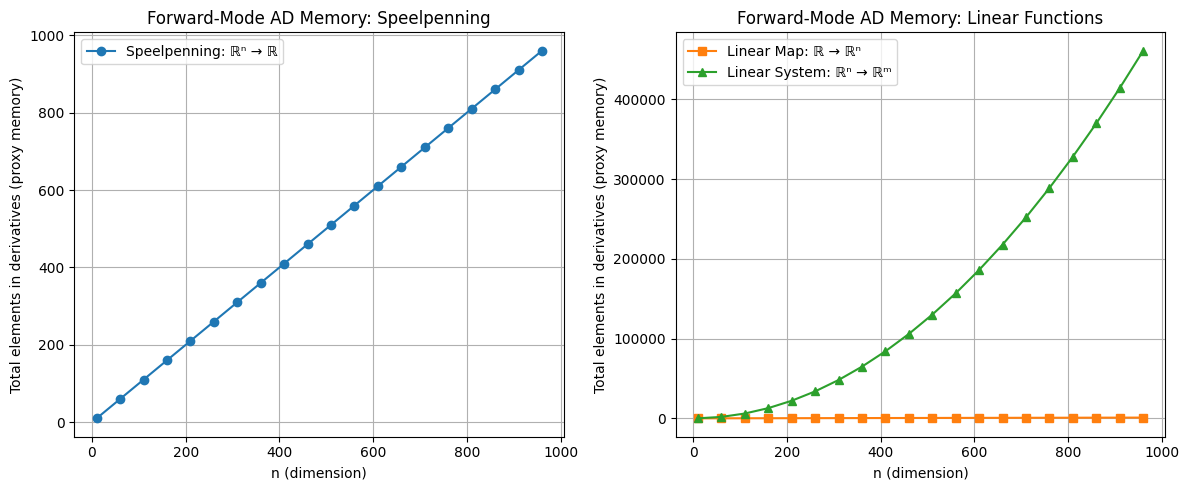

In [9]:
### Forward Mode ###
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

# Functions 
def speelpenning(x):
    return jnp.prod(x)

def linear_map(x, n):
    a = jnp.arange(1.0, n + 1)
    return a * x

def linear_system(x, A):
    return A @ x

# Forward memory helper 
def forward_memory(f, x):
    if x.ndim == 0:
        y, dy = jax.jvp(f, (x,), (jnp.array(1.0),))
        return dy.size
    else:
        count = 0
        for i in range(x.size):
            basis = jnp.zeros_like(x).at[i].set(1.)
            y, dy = jax.jvp(f, (x,), (basis,))
            count += dy.size
        return count

# Compute memory 
ns = np.arange(10, 1001, 50)
mem_forward = {'speel': [], 'linmap': [], 'linsys': []}

for n in ns:
    x = jnp.arange(1.0, n + 1)
    mem_forward['speel'].append(forward_memory(speelpenning, x))

    x_scalar = jnp.array(2.0)
    mem_forward['linmap'].append(forward_memory(lambda x: linear_map(x, n), x_scalar))

    m = n // 2
    A = jnp.arange(1.0, m*n+1).reshape(m, n)
    x = jnp.arange(1.0, n + 1)
    mem_forward['linsys'].append(forward_memory(lambda x: linear_system(x, A), x))

# Plot 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Left plot: Speelpenning 
axes[0].plot(ns, mem_forward['speel'], 'o-', color='tab:blue', label="Speelpenning: ℝⁿ → ℝ")
axes[0].set_title("Forward-Mode AD Memory: Speelpenning")
axes[0].set_xlabel("n (dimension)")
axes[0].set_ylabel("Total elements in derivatives (proxy memory)")
axes[0].grid(True)
axes[0].legend()

# Right plot: Linear Map & Linear System 
axes[1].plot(ns, mem_forward['linmap'], 's-', color='tab:orange', label="Linear Map: ℝ → ℝⁿ")
axes[1].plot(ns, mem_forward['linsys'], '^-', color='tab:green', label="Linear System: ℝⁿ → ℝᵐ")
axes[1].set_title("Forward-Mode AD Memory: Linear Functions")
axes[1].set_xlabel("n (dimension)")
axes[1].set_ylabel("Total elements in derivatives (proxy memory)")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()


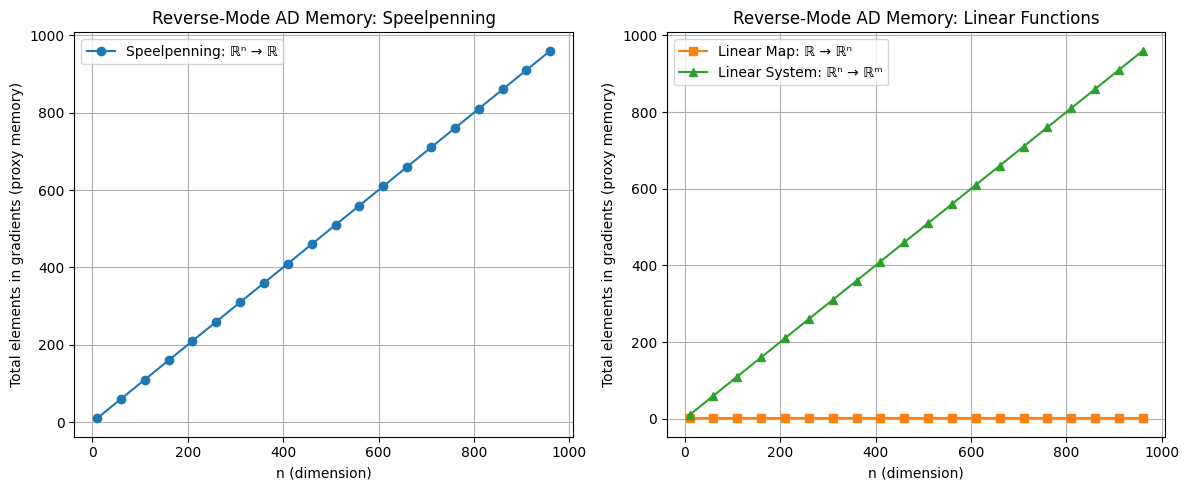

In [10]:
### Reverse Mode ###
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

# Functions 
def speelpenning(x):
    return jnp.prod(x)

def linear_map(x, n):
    a = jnp.arange(1.0, n + 1)
    return a * x

def linear_system(x, A):
    return A @ x

# Reverse memory helper 
def reverse_memory(f, x):
    y, vjp_fun = jax.vjp(f, x)
    if y.ndim == 0:
        ybar = jnp.array(1.0)
    else:
        ybar = jnp.ones_like(y)
    dx = vjp_fun(ybar)
    return sum(d.size for d in dx)

# Compute memory 
ns = np.arange(10, 1001, 50)
mem_reverse = {'speel': [], 'linmap': [], 'linsys': []}

for n in ns:
    x = jnp.arange(1.0, n + 1)
    mem_reverse['speel'].append(reverse_memory(speelpenning, x))

    x_scalar = jnp.array(2.0)
    mem_reverse['linmap'].append(reverse_memory(lambda x: linear_map(x, n), x_scalar))

    m = n // 2
    A = jnp.arange(1.0, m*n+1).reshape(m, n)
    x = jnp.arange(1.0, n + 1)
    mem_reverse['linsys'].append(reverse_memory(lambda x: linear_system(x, A), x))

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Left plot: Speelpenning 
axes[0].plot(ns, mem_reverse['speel'], 'o-', color='tab:blue', label="Speelpenning: ℝⁿ → ℝ")
axes[0].set_title("Reverse-Mode AD Memory: Speelpenning")
axes[0].set_xlabel("n (dimension)")
axes[0].set_ylabel("Total elements in gradients (proxy memory)")
axes[0].grid(True)
axes[0].legend()

# Right plot: Linear Map + Linear System 
axes[1].plot(ns, mem_reverse['linmap'], 's-', color='tab:orange', label="Linear Map: ℝ → ℝⁿ")
axes[1].plot(ns, mem_reverse['linsys'], '^-', color='tab:green', label="Linear System: ℝⁿ → ℝᵐ")
axes[1].set_title("Reverse-Mode AD Memory: Linear Functions")
axes[1].set_xlabel("n (dimension)")
axes[1].set_ylabel("Total elements in gradients (proxy memory)")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()


| Function Type | Input → Output | Forward-Mode Memory | Reverse-Mode Memory | Notes |
|----------------|----------------|---------------------|---------------------|-------|
| **Speelpenning** | ℝⁿ → ℝ | O(n) | O(n) | Reverse stores entire trace; forward uses less temporary data. |
| **Linear Map** | ℝ → ℝⁿ | O(n) | O(1) | Reverse is much more memory-efficient. |
| **Linear System** | ℝⁿ → ℝᵐ | O(n·m) | O(n + m) | Reverse mode uses less memory for large systems. |


# AD attributes
Let's now look into some other AD attributes.

## Computational Graph

The following code builds and visualizes the computational graph for the function $f(x, y) = \sin(xy + e^x)$, showing the flow of intermediate computations from inputs to output.


Here is the computational graph:

![Computational Graph](comp_graph.png)


## AD Taping with JAX

This code uses JAX to display the **tape of operations** (JAXPR) for the function $f(x, y) = \sin(xy + e^x)$, showing the sequence of primitive computations recorded during the forward pass.


In [11]:
import jax
import jax.numpy as jnp

def f(x, y):
    return jnp.sin(x * y + jnp.exp(x))

x0, y0 = 1.0, 2.0

# Print the computational trace (JAXPR)
jax.make_jaxpr(f)(x0, y0)


{ lambda ; a:f32[] b:f32[]. let
    c:f32[] = mul a b
    d:f32[] = exp a
    e:f32[] = add c d
    f:f32[] = sin e
  in (f,) }

## Summation vs Nesting in AD

**Summation inside nesting**

Each nested function returns a scalar, then you sum over outputs:
$
F(x) = \sum_{i=1}^{m} f_n \circ f_{n-1} \circ \dots \circ f_1 (x_i)
$

- **Forward mode:** cost scales with input dimension (each input propagates derivative).  
- **Reverse mode:** single backward sweep computes all derivatives w.r.t. inputs efficiently.



**Nesting inside summation**

Each element of a sum itself is a nested composition:
$
F(x) = f_n \circ f_{n-1} \circ \dots \circ f_1 \Big( \sum_{i=1}^{m} x_i \Big)
$

- **Forward mode:** cheap if input is scalar (sum collapses inputs).  
- **Reverse mode:** still stores intermediates for each nested step; memory scales with nesting depth.


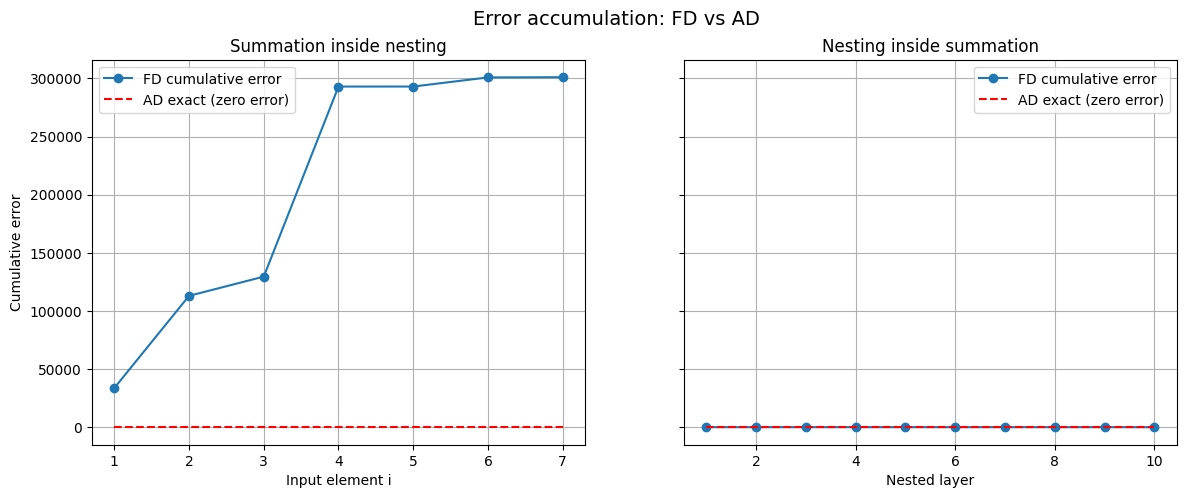

In [12]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

# Settings 
n = 10           # nested depth
m = 7           # number of inputs for summation inside nesting
x = jnp.arange(1.0, m+1)  # input vector
eps = 1e-5      # finite difference epsilon

a = jnp.arange(1, n+1, dtype=jnp.float32)
b = jnp.arange(1, n+1, dtype=jnp.float32) * 0.5

# Nested function 
def nested_chain_scalar(xi):
    vals = []
    for i in reversed(range(n)):
        xi = jnp.sin(a[i]*xi + b[i])
        vals.append(xi)
    return xi, vals[::-1]  # output and intermediate values

# Summation inside nesting 
def sum_inside_nesting(x):
    return jnp.sum(jax.vmap(lambda xi: nested_chain_scalar(xi)[0])(x))

# Nesting inside summation
def nesting_inside_sum(x):
    s = jnp.sum(x)
    for i in reversed(range(n)):
        s = jnp.sin(a[i]*s + b[i])
    return s

# AD gradients 
grad_ad_sum = jax.grad(sum_inside_nesting)(x)
grad_ad_nest = jax.grad(nesting_inside_sum)(x)

# FD error tracking 
def fd_cumulative_error_sum(x):
    cumulative_errors = []
    current_error = 0.0
    for idx, xi in enumerate(x):
        # finite differences for this input
        f_plus = nested_chain_scalar(xi + eps)[0]
        f_minus = nested_chain_scalar(xi - eps)[0]
        grad_fd = (f_plus - f_minus) / (2*eps)
        grad_ad_exact = jax.grad(lambda z: nested_chain_scalar(z)[0])(xi)
        err = jnp.abs(grad_fd - grad_ad_exact)
        current_error += err
        cumulative_errors.append(current_error)
    return cumulative_errors

def fd_cumulative_error_nest(x):
    # sum first
    s = jnp.sum(x)
    cumulative_errors = []
    current_error = 0.0
    s_fd = s
    intermediates = []
    # get intermediates
    for i in reversed(range(n)):
        s_fd = jnp.sin(a[i]*s_fd + b[i])
        intermediates.append(s_fd)
    intermediates = intermediates[::-1]
    s_fd = s
    for i in reversed(range(n)):
        # FD derivative for layer i
        f_plus = jnp.sin(a[i]*(s_fd + eps) + b[i])
        f_minus = jnp.sin(a[i]*(s_fd - eps) + b[i])
        grad_fd = (f_plus - f_minus) / (2*eps)
        # AD derivative
        ad_local = a[i] * jnp.cos(a[i]*intermediates[i] + b[i])
        err = jnp.abs(grad_fd - ad_local)
        current_error += err
        cumulative_errors.append(current_error)
        s_fd = intermediates[i]
    return cumulative_errors[::-1]

cumulative_error_sum = fd_cumulative_error_sum(x)
cumulative_error_nest = fd_cumulative_error_nest(x)

# Plot side by side 
fig, axs = plt.subplots(1,2, figsize=(14,5), sharey=True)

# Summation inside nesting
axs[0].plot(range(1,m+1), cumulative_error_sum, marker='o', label='FD cumulative error')
axs[0].plot(range(1,m+1), [0]*m, 'r--', label='AD exact (zero error)')
axs[0].set_xlabel('Input element i')
axs[0].set_ylabel('Cumulative error')
axs[0].set_title('Summation inside nesting')
axs[0].grid(True)
axs[0].legend()

# Nesting inside summation
axs[1].plot(range(1,n+1), cumulative_error_nest, marker='o', label='FD cumulative error')
axs[1].plot(range(1,n+1), [0]*n, 'r--', label='AD exact (zero error)')
axs[1].set_xlabel('Nested layer')
axs[1].set_title('Nesting inside summation')
axs[1].grid(True)
axs[1].legend()

plt.suptitle('Error accumulation: FD vs AD', fontsize=14)
plt.show()


## Hands on exercises

In this exercise, we will use **JAX** to compute gradients of a **Mean Squared Error (MSE)** loss function. This is a warm-up for understanding **backpropagation** in neural networks.


**Dataset:**  
- $x = [1, 2, 3, 4]$  
- $y = [2, 4, 6, 8]$  

**Model:**  
- Linear: $y = w \cdot x + b$  
- Loss: MSE

Compute the following:

- **Define MSE function** using `jnp` and params $[w, b]$  
- **Compute gradient** with `jax.grad` and evaluate at an initial guess  
- **Forward-mode AD (`jax.jvp`)**: compute $J\cdot v$ for $v = [0.1, 0.1]$  
- **Reverse-mode AD (`jax.vjp`)**: compute $v^T\cdot J$ for scalar cotangent $c = 1.0$  

Bonus: Perform a few **gradient descent updates** and observe loss decrease

# Neural Networks
Let's now understand how AD is used in Neural Networks (NN).

## Simple NN
In the current example, the network simply outputs:
$
y = W_2 \cdot \tanh(W_1 x + b_1) + b_2
$

However, to compute meaningful gradients (via forward- or reverse-mode AD), we need a **scalar loss function** that measures how far the network’s prediction is from a target.  

**Example: Mean Squared Error (MSE)**

For a single sample:
$
\mathcal{L}(x) = \frac{1}{2} \| \text{NN}(x) - y_\text{target} \|^2
$



Let us consider a small NN:

![Small NN](small_NN.png)


In [1]:
import jax
import jax.numpy as jnp

# Network dimensions
d_in, h, d_out = 3, 4, 2

# Random parameters
key = jax.random.PRNGKey(0)
W1 = jax.random.normal(key, (h, d_in))
b1 = jax.random.normal(key, (h,))
W2 = jax.random.normal(key, (d_out, h))
b2 = jax.random.normal(key, (d_out,))

x = jnp.array([0.5, -1.0, 2.0])

# Neural network
def nn(x):
    h1 = jnp.tanh(W1 @ x + b1)
    out = W2 @ h1 + b2
    return out

# Forward-mode (JVP)
tangent = jnp.ones_like(x)  # propagate ones for simplicity
_, jvp_out = jax.jvp(nn, (x,), (tangent,))
print("Forward-mode (JVP) output:", jvp_out)

# Reverse-mode (VJP / gradient)
grad_rev = jax.jacfwd(nn)(x)  # input -> output Jacobian
print("Reverse-mode Jacobian:", grad_rev)


Forward-mode (JVP) output: [2.235661   0.97594565]
Reverse-mode Jacobian: [[ 2.2021472   2.822742   -2.7892277 ]
 [ 0.54790074 -0.11629259  0.5443374 ]]


## NN loss with backpropagation

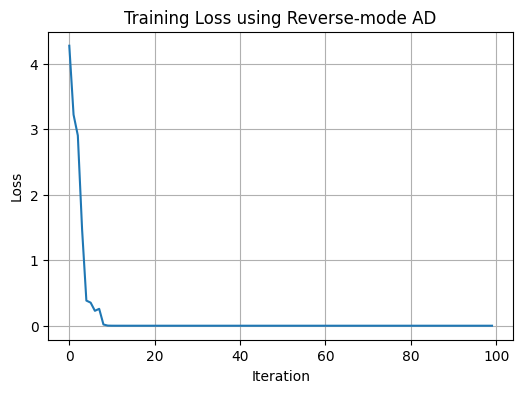

In [2]:
import jax
import jax.numpy as jnp
from jax import grad, random
import matplotlib.pyplot as plt

# Network dimensions
d_in, h, d_out = 782, 128, 10
key = random.PRNGKey(42)

# Initialize parameters
key, k1, k2, k3, k4 = random.split(key, 5)
W1 = random.normal(k1, (h, d_in)) * 0.1
b1 = jnp.zeros(h)
W2 = random.normal(k2, (d_out, h)) * 0.1
b2 = jnp.zeros(d_out)

# Neural network 
def nn(params, x):
    W1, b1, W2, b2 = params
    h1 = jnp.tanh(W1 @ x + b1)
    out = W2 @ h1 + b2
    return out

# Loss function: MSE
y_target = random.normal(k3, (d_out,))  # target output
def loss_fn(params, x, y_target):
    y_pred = nn(params, x)
    return 0.5 * jnp.sum((y_pred - y_target) ** 2)

# Reverse-mode AD gradient
grad_fn = grad(loss_fn)  # computes gradient w.r.t params

# Gradient descent loop
learning_rate = 0.01
n_steps = 100

params = (W1, b1, W2, b2)
x_input = random.normal(k4, (d_in,))  # example input

loss_history = []

for step in range(n_steps):
    grads = grad_fn(params, x_input, y_target)
    # Gradient descent update
    params = tuple(p - learning_rate * g for p, g in zip(params, grads))
    loss_history.append(loss_fn(params, x_input, y_target))

# Plot loss over iterations
plt.figure(figsize=(6,4))
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss using Reverse-mode AD")
plt.grid(True)
plt.show()


## Hands on exercise

Tiny Neural Network backpropagation exercise:

**Network Setup:**  
- Input: 2 neurons  
- Hidden: 2 neurons, activation `tanh`  
- Output: 1 neuron (regression)  

**Dataset:**  
- $X = [[1.0, 2.0], [2.0, 1.0], [1.5, 1.5]]$  
- $Y = [3.0, 3.5, 3.0]$  

**Parameters:**  
- $W_1, b_1 \rightarrow$ hidden layer  
- $W_2, b_2 \rightarrow$ output layer  

Compute the following:

- Implement **forward pass**: `forward(params, x)`  
- Define **MSE loss** over the dataset  
- Compute **gradients** w.r.t all parameters using `jax.grad`  
- **Visualize gradients** for hidden and output layers


# Summary

**Automatic Differentiation (AD)** is a set of techniques to **compute exact derivatives of functions specified by computer programs**. Unlike numerical differentiation (finite differences) or symbolic differentiation, AD:

- Computes derivatives **accurately up to machine precision**  
- Handles **arbitrary control flow** (loops, conditionals)  
- Works in two main modes:  
  - **Forward mode (`jvp`)** – efficient when the number of inputs is small  
  - **Reverse mode (`vjp` / `grad`)** – efficient when the number of outputs is small (used in backpropagation for neural networks)

AD is the foundation of modern **machine learning frameworks** like JAX, TensorFlow, and PyTorch.

AD is widely used and **implemented in many programming languages**:

- **Python**: JAX, TensorFlow, PyTorch, Autograd  
- **C++**: Adept, CppAD  
- **Julia**: ForwardDiff.jl, Zygote.jl  
- **R**: `autodiffr`, `torch`  
- **Matlab**: ADiMat  
- **Fortran**: Tapenade

Despite differences in syntax and implementation, the **core idea of computing derivatives via chain rule systematically** remains the same.  

Learn more at [autodiff.org](https://www.autodiff.org/).
